## One Sample t test 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
philips_data = pd.read_csv("D:/Desktop/Desktop_Important/Machine Learning/Hypothesis Testing/bulb.csv")

In [3]:
philips_data.head()

,Lifetime_Yrs
0,14
1,12
2,11
3,10
4,12


In [4]:
philips_data.shape

(14, 1)

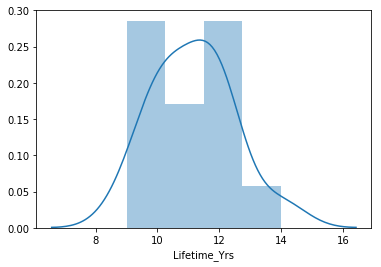

In [5]:
sns.distplot(philips_data["Lifetime_Yrs"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1162fb70>,
 'caps': [<matplotlib.lines.Line2D at 0x1162ff98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1162f710>],
 'medians': [<matplotlib.lines.Line2D at 0x116388d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11638c18>],
 'means': []}

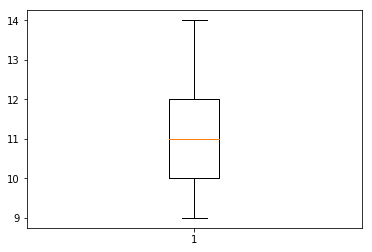

In [6]:
plt.boxplot(philips_data["Lifetime_Yrs"])

In [10]:
import scipy.stats as stat

In [8]:
stat.ttest_1samp(philips_data["Lifetime_Yrs"],15)

Ttest_1sampResult(statistic=-11.1667975902249, pvalue=4.929462080675204e-08)

In [32]:
result = stat.ttest_1samp(philips_data["Lifetime_Yrs"],15)

In [34]:
(result[1]/2)<0.05

True

In [35]:
result[0]

3.464101615137754

In [13]:
philips_data["Lifetime_Yrs"].mean()

9.327586206896552

In [14]:
import scipy.stats as stats

In [11]:
result = stats.ttest_1samp(philips_data['Lifetime_Yrs'], 15)

In [12]:
result[0]

-11.1667975902249

In [13]:
result[1]

4.929462080675204e-08

In [14]:
# Greater than test
#In the case of a one-sided alternative, the sign of the t-statistic matters A LOT. 
#A negative sign implies that the sample mean is less than the hypothesized mean. 
#A positive sign implies that the sample mean is greater than the hypothesized mean. 
result = stats.ttest_1samp(philips_data['Lifetime_Yrs'], 15)

In [15]:
# Greater than test
(result[1]/2)<0.05

True

In [15]:
result[0]>0

False

In [16]:
# Less than test
(result[1]/2)<0.05

True

In [17]:
result[0]<0

True

In [24]:
(philips_data.mean()-15)/(1.18/np.sqrt(28))

Lifetime_Yrs   -25.436943
dtype: float64

In [20]:
import statistics as stat

In [22]:
philips_data.describe()

,Lifetime_Yrs
count,29.000000
mean,9.327586
std,1.182279
min,7.000000
25%,9.000000
50%,9.000000
75%,10.000000
max,11.000000


## Two-Sample T-Test

In [15]:
import pandas as pd

In [16]:
city_rating = pd.read_csv("D:/Desktop/Desktop_Important/Machine Learning/Hypothesis Testing/city_ratings.csv")

In [17]:
stats.ttest_ind(city_rating["Rating"][city_rating["City"]==1], city_rating["Rating"][city_rating["City"]==2])

Ttest_indResult(statistic=-2.5297666878768013, pvalue=0.01710411868326595)

In [28]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

## Paired t test

In [19]:
student_scores = pd.read_csv("D:/Desktop/Desktop_Important/Machine Learning/Hypothesis Testing/students_scores.csv")

In [20]:
student_scores.head()

,Before,After
0,18,19
1,17,22
2,21,24
3,14,12
4,18,20


In [21]:
stats.ttest_rel(student_scores['Before'], student_scores['After'])

Ttest_relResult(statistic=-2.0526315789473686, pvalue=0.07031372598901667)

## Chisquare test of independence

In [23]:
adult_logistics = pd.read_csv("D:/Desktop/Desktop_Important/Machine Learning/Hypothesis Testing/adult_logistic.csv")

In [24]:
adult_logistics.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
data = pd.crosstab(adult_logistics["Education"],adult_logistics["Class"])

In [26]:
data

Class,<=50K,>50K
Education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


In [27]:
chi2, p, dof, exp = stats.chi2_contingency(data)

In [34]:
print(p)

0.0


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import pandas as pd
import numpy as np

In [29]:
insurance_data = pd.read_csv("D:/dataset/insurance.csv")  

In [30]:
pd.options.display.float_format = '{:.2f}'.format

In [31]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [32]:
insurance_data.groupby("smoker").mean()

,age,bmi,children,Premium
smoker,,,,
no,39.13,30.68,1.08,8357.46
occasionally,39.75,30.60,1.10,13668.21
yes,38.37,30.72,1.12,32065.02


In [33]:
insurance_data['smoker'] = insurance_data['smoker'].astype('category')

In [36]:
result = ols('Premium~C(smoker)',data=insurance_data).fit()

In [37]:
#The model’s intercept is the base (control) group
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     502.1
Date:                Sun, 19 Jan 2020   Prob (F-statistic):          2.54e-163
Time:                        00:28:57   Log-Likelihood:                -14102.
No. Observations:                1338   AIC:                         2.821e+04
Df Residuals:                    1335   BIC:                         2.823e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  8357.4585    334.753     24.966      0.000    7700.759    9014.158
C(smoker)[T.occasionally]  5310.7482    565.731      9.387      0.000    4200.930    6420.566
C(smoker)[T.yes]           2.371e+04    748.531     31.672      0.000    2.22e+04    2.52e+04
==============================================================================
Omnibus:                      308.795   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.495
Skew:                           1.304   Prob(JB):                    2.78e-143
Kurtosis:                       5.230   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let’s interpret the table. Overall the model is significiant, F= 2178, p close to 0. 
#### This tells us that there is a significant difference in the group means. 
#### The coefficients (coef in the table), are the difference in mean between the control group and the respective group listed. 
#### The intercept is the mean for the no smoking group
#### Looking at the p-values now (P>|t| in the table), we can see the difference between smoker (No) and smoker(yes) is significant.
#### Coming from the ANOVA framework, the information we are really after in this table it the F-statistic and it’s corresponding p-value. 
#### This tells us if we explained a significant amount of the overall variance. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other. 

In [15]:
help(sm.stats.anova_lm)

Help on function anova_lm in module statsmodels.stats.anova:

anova_lm(*args, **kwargs)
    Anova table for one or more fitted linear models.
    
    Parameters
    ----------
    args : fitted linear model results instance
        One or more fitted linear models
    scale : float
        Estimate of variance, If None, will be estimated from the largest
        model. Default is None.
    test : str {"F", "Chisq", "Cp"} or None
        Test statistics to provide. Default is "F".
    typ : str or int {"I","II","III"} or {1,2,3}
        The type of Anova test to perform. See notes.
    robust : {None, "hc0", "hc1", "hc2", "hc3"}
        Use heteroscedasticity-corrected coefficient covariance matrix.
        If robust covariance is desired, it is recommended to use `hc3`.
    
    Returns
    -------
    anova : DataFrame
    A DataFrame containing.
    
    Notes
    -----
    Model statistics are given in the order of args. Models must have
    been fit using the formula api.
    
   

In [44]:
aov_table = sm.stats.anova_lm(result, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(smoker),121519903621.67,1.00,2177.61,0.00
Residual,74554317946.70,1336.00,nan,nan


#### Let’s break down this ANOVA table.
#### The sum of squares for the model (SSM; value 121519903621.67 in the table) is how much variance is explained by our model. 
#### The current model explains a significant amount of variance, F= 2177, p < 0.05. 
#### The residual row is the unsystematic variation in the data (SSR; also called the unexplained variance; value 74554317946.70 in the table). 

In [18]:
121519903621.67/(74554317946.70/1336)

2177.6148680565757

In [45]:
# Test for Homogeneity of Variance
# Levene’s test for homogeneity of variance is significant which indicates that the groups have un-equal variances.
# homogeneity of variance assumption should be checked for each level of the categorical variable
stats.levene(insurance_data["Premium"][insurance_data['smoker']=='yes'],
             insurance_data["Premium"][insurance_data['smoker']=='no'])

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [46]:
# Test for Normality,The assumption of normality is tested on the residuals
# The results from the Shapiro-Wilk test is statistically significant which indicates that the residuals are not normally distributed.
# One could use the Jarque-Bera test provided, or one could use Shapiro or others.
stats.shapiro(result.resid)

(0.96083664894104, 1.672499434782965e-18)

In [37]:
 model = ols('Premium ~ C(gender)*C(smoker)', insurance_data).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     732.6
Date:                Tue, 03 Sep 2019   Prob (F-statistic):          2.15e-281
Time:                        00:43:22   Log-Likelihood:                -13826.
No. Observations:                1338   AIC:                         2.766e+04
Df Residuals:                    1334   BIC:                         2.768e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           8762.2973    318.582     27.504      0.000    8137.320    9387.275
C(gender)[T.male]                   -675.0926    457.033     -1.477      0.140   -1571.674     221.489
C(smoker)[T.yes]                    2.192e+04    764.367     28.673      0.000    2.04e+04    2.34e+04
C(gender)[T.male]:C(smoker)[T.yes]  3038.1023   1020.200      2.978      0.003    1036.730    5039.474
==============================================================================
Omnibus:                      143.357   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.429
Skew:                           0.747   Prob(JB):                     9.18e-51
Kurtosis:                       4.379   Cond. No.                         7.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(gender),1.421312e+06,1.0,0.025601,8.729026e-01
C(smoker),1.208777e+11,1.0,2177.284440,1.247285e-282
C(gender):C(smoker),4.923397e+08,1.0,8.868165,2.954255e-03
Residual,7.406056e+10,1334.0,NaN,NaN


In [41]:
# The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. 
# There are a few different techniques that can be used
# Tukey’s HSD is one of the technique for the post-hoc comparision
import statsmodels.stats.multicomp

In [43]:
md = statsmodels.stats.multicomp.MultiComparison(insurance_data['Premium'], insurance_data['smoker'])
md_results = md.tukeyhsd()
print(md_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  no    yes   23615.9635 22623.1748 24608.7523  True 
-----------------------------------------------------


In [44]:
md = statsmodels.stats.multicomp.MultiComparison(insurance_data['Premium'], insurance_data['gender'])
md_results = md.tukeyhsd()
print(md_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff  lower    upper   reject
------------------------------------------------
female  male  1387.1723 89.8123 2684.5324  True 
------------------------------------------------


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

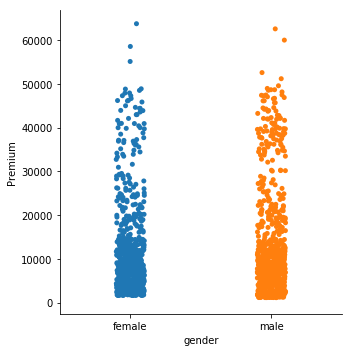

In [47]:
sns.catplot('gender','Premium',data=insurance_data)

C:\Users\Santosh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


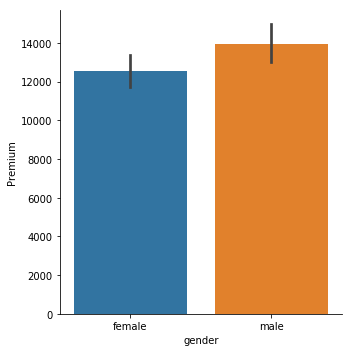

In [48]:
sns.catplot('gender','Premium',data=insurance_data,kind='bar')

In [25]:
results = ols('Premium ~ C(smoker) + age',insurance_data).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:06:16   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
C(smoker)[T.yes]  2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
age                274.8712     12.455     22.069      0.000     250.437     299.305
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""